In [3]:
import cv2
print(cv2.__version__)
import numpy as np
import matplotlib.pyplot as plt

4.11.0


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

EJERCICIO 4.2

Al final del proceso de manufactura de placas madres, de marca ASUS modelo
A7V600, se obtienen dos clases de producto final: A7V600-x y A7V600-SE.
Implemente un algoritmo, que a partir de una imagen, determine que tipo de
placa es. Haga uso de las t´ecnicas de realce apendidas y utilice las im´agenes
a7v600-x.gif y a7v600-SE.gif. Adapte el m´etodo de forma que contemple el
reconocimiento de im´agenes que han sido afectadas por un ruido aleatorio
impulsivo (a7v600-x(RImpulsivo).gif y a7v600-SE(RImpulsivo).gif )

In [6]:
def operacion_resta_metodo1(image1,image2):
    #diff = image1.astype(np.float32) - image2.astype(np.float32)
    #rescala_1 = ((diff + 255) / 2).astype(np.uint8)
    return cv2.absdiff(image1, image2)

def operacion_resta_metodo2(image1,image2):
    if image1.shape != image2.shape:
        image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))  # (ancho, alto)

    diff = image1.astype(np.float32) - image2.astype(np.float32)
    # Método 2: escalar el rango real de diferencias
    min_val = diff.min()
    max_val = diff.max()

    if max_val - min_val == 0:
        rescala_2 = np.zeros_like(diff, dtype=np.uint8)
    else:
        rescala_2 = ((diff - min_val) * (255.0 / (max_val - min_val))).astype(np.uint8)
    return rescala_2

In [7]:
# Cargamos los gifs
gif1 = cv2.VideoCapture('./imagenes/a7v600-SE.gif',cv2.IMREAD_GRAYSCALE)
gif2 = cv2.VideoCapture('./imagenes/a7v600-X.gif',cv2.IMREAD_GRAYSCALE)
gif3 = cv2.VideoCapture('./imagenes/a7v600-SE(RImpulsivo).gif',cv2.IMREAD_GRAYSCALE)
gif4 = cv2.VideoCapture('./imagenes/a7v600-X(RImpulsivo).gif',cv2.IMREAD_GRAYSCALE)
# gif1 = cv2.VideoCapture('/content/drive/MyDrive/Facultad/PDI2024/Trabajos_Practicos/Imagenes/a7v600-SE.gif',cv2.IMREAD_GRAYSCALE)
# gif2 = cv2.VideoCapture('/content/drive/MyDrive/Facultad/PDI2024/Trabajos_Practicos/Imagenes/a7v600-X.gif',cv2.IMREAD_GRAYSCALE)
# gif3 = cv2.VideoCapture('/content/drive/MyDrive/Facultad/PDI2024/Trabajos_Practicos/Imagenes/a7v600-SE(RImpulsivo).gif',cv2.IMREAD_GRAYSCALE)
# gif4 = cv2.VideoCapture('/content/drive/MyDrive/Facultad/PDI2024/Trabajos_Practicos/Imagenes/a7v600-X(RImpulsivo).gif',cv2.IMREAD_GRAYSCALE)

# Tomamos el primer frame
ret, imagen11 = gif1.read()
gif1.release();
ret, imagen22 = gif2.read()
gif2.release();
ret, imagen33 = gif3.read()
gif3.release();
ret, imagen44 = gif4.read()
gif4.release();

# Pasamos las imgaenes a escala de grices
img_original_SE = cv2.cvtColor(imagen11,cv2.COLOR_BGR2GRAY)
img_original_X = cv2.cvtColor(imagen22,cv2.COLOR_BGR2GRAY)
img_con_ruido_SE = cv2.cvtColor(imagen33,cv2.COLOR_BGR2GRAY)
img_con_ruido_X = cv2.cvtColor(imagen44,cv2.COLOR_BGR2GRAY)

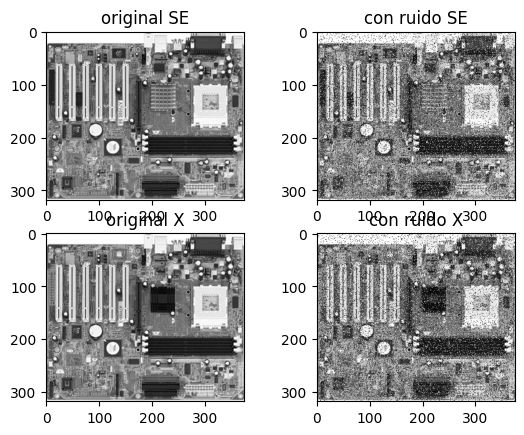

In [8]:
plt.figure()
plt.subplot(2,2,1)
plt.imshow(img_original_SE, cmap='gray'); plt.title('original SE');
plt.subplot(2,2,2)
plt.imshow(img_con_ruido_SE, cmap='gray'); plt.title('con ruido SE');
plt.subplot(2,2,3)
plt.imshow(img_original_X, cmap='gray'); plt.title('original X');
plt.subplot(2,2,4)
plt.imshow(img_con_ruido_X, cmap='gray'); plt.title('con ruido X');

In [9]:
referencias = {
    'A7V600-X': np.array(img_original_X),
    'A7V600-SE': np.array(img_original_SE),
}

img_con_ruido = {
    'a7v600-X(RImpulsivo)': np.array(img_con_ruido_X),
    'a7v600-SE(RImpulsivo)': np.array(img_con_ruido_SE)
}

for nombre_ruido, imagen_ruido in img_con_ruido.items():
    diferencia = {}
    for nombre, referencia in referencias.items():
      diferencia_metodo1 = operacion_resta_metodo1(referencia, imagen_ruido)
      bit_plane_metodo1 = cv2.bitwise_and(diferencia_metodo1, 1 << 7)
      #plt.imshow(bit_plane_metodo1, cmap='gray')
      #plt.axis('off')  # No mostrar ejes
      #plt.show()
      #media -> más blanco en la imagen? -> la imagen tiene diferencia por ende no es
      diferencia[nombre] = np.mean(bit_plane_metodo1)

    similitud= min(diferencia, key=diferencia.get)
    print(f"Imagen entrante : {nombre_ruido} → Clase: {similitud}")

Imagen entrante : a7v600-X(RImpulsivo) → Clase: A7V600-X
Imagen entrante : a7v600-SE(RImpulsivo) → Clase: A7V600-SE


EJERCICIO 4.3

En una f´abrica de medicamentos se desea implementar un sistema para la
inspecci´on visual autom´atica de blisters en la l´ınea de empaquetado. La ad-
quisici´on de la imagen se realiza en escala de grises mediante una c´amara
CCD fija y bajo condiciones controladas de iluminaci´on, escala y enfoque. El
objetivo consiste en determinar en cada instante si el blister que est´a siendo
analizado se encuentra incompleto, en cuyo caso la regi´on correspondiente a
la p´ıldora faltante presenta una intensidad similar al fondo. Escriba una fun-
ci´on que reciba como par´ametro la imagen del blister a analizar y devuelva
un mensaje indicando si el mismo contiene o no la totalidad de las p´ıldo-
ras. En caso de estar incompleto, indique la posici´on (x,y) de las p´ıldoras
faltantes. Verifique el funcionamiento con las im´agenes blister completo.jpg y
blister incompleto.jpg.

In [ ]:
def get_position(imagen, axis=0):
    x = imagen.mean(axis=axis)
    if imagen.mean() > 50: x = np.abs(x - max(x)) # corrijo el rango
    xx = np.where(np.diff(x > 0) != 0)[0].tolist() # obtengo los inicios de los objetos
    objects = list(zip(xx[::2], xx[1::2])) 
    anchos = [ fin-ini for ini,fin in objects] # obtengo el ancho de los objetos
    return objects[anchos.index(max(anchos))]

def get_x_y(imagen):
    xx = get_position(imagen, 0)
    yy = get_position(imagen, 1)
    return [(xx[0],yy[0]), (xx[1],yy[1])]

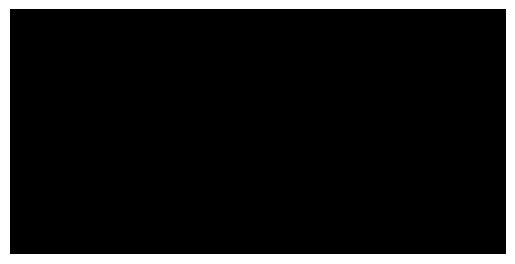

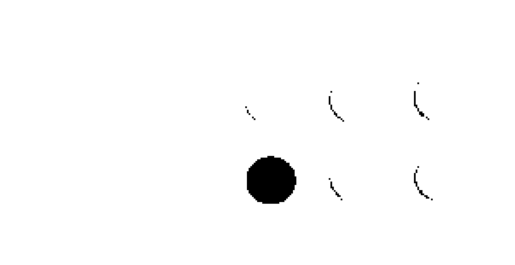

el objeto faltante esta en la posicion: (137, 85)
Imagen entrante: Completo → Estado: Blister completo


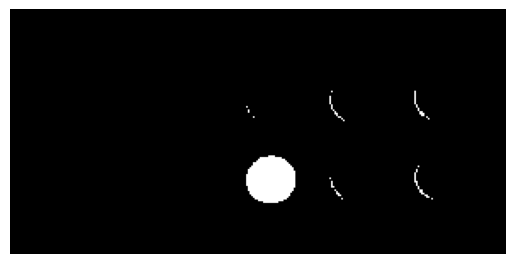

el objeto faltante esta en la posicion: (138, 85)


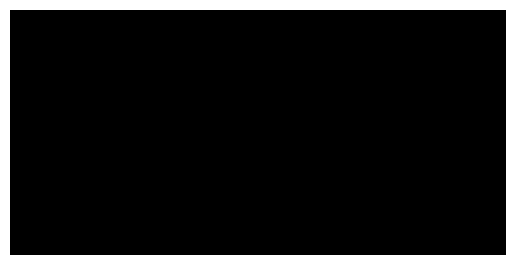

Imagen entrante: Incompleto → Estado: Blister incompleto


In [30]:
# Cargar imágenes en escala de grises directamente con OpenCV
# img_completa = cv2.imread('/content/drive/MyDrive/Facultad/PDI2024/Trabajos_Practicos/Imagenes/blister_completo.jpg', cv2.IMREAD_GRAYSCALE)
# img_incompleta = cv2.imread('/content/drive/MyDrive/Facultad/PDI2024/Trabajos_Practicos/Imagenes/blister_incompleto.jpg', cv2.IMREAD_GRAYSCALE)
img_completa = cv2.imread('./imagenes/blister_completo.jpg', cv2.IMREAD_GRAYSCALE)
img_incompleta = cv2.imread('./imagenes/blister_incompleto.jpg', cv2.IMREAD_GRAYSCALE)

# Diccionario con las imágenes originales
referencias = {
    'Blister completo': img_completa,
    'Blister incompleto': img_incompleta,
}

# Diccionario con las imágenes ruidosas
img = {
    'Completo': img_completa,
    'Incompleto': img_incompleta,
}

# Procesar cada imagen con ruido
for nombre_img, imagen in img.items():
    diferencia = {}

    for nombre, referencia in referencias.items():
        diferencia_metodo1 = operacion_resta_metodo2(referencia, imagen)
        bit_plane_metodo1 = cv2.bitwise_and(diferencia_metodo1, 1 << 7)
        plt.figure()
        plt.imshow(bit_plane_metodo1, cmap='gray')
        plt.axis('off')  # No mostrar ejes
        plt.show()
        diferencia[nombre] = np.mean(bit_plane_metodo1)
        if diferencia[nombre] != 0:
            posiciones = get_x_y(bit_plane_metodo1)
            print(f'el objeto faltante esta en la posicion: {posiciones[0]}')

    similitud = min(diferencia, key=diferencia.get)

    print(f"Imagen entrante: {nombre_img} → Estado: {similitud}")


¿Por qué el bit más significativo resalta más la figura?

Porque ese bit es el que más contribuye al valor total del píxel. Si está encendido, significa que el píxel tiene un valor alto (en la mitad superior de la escala de grises, 128–255).
Entonces...

 * Cuando hacés una operación de resta (diferencia_metodo2) y luego aplicás el bit más alto,
 * Estás viendo dónde hay diferencias significativas entre las imágenes — es decir, dónde hay cambios "grandes".
 * Esos cambios grandes, muchas veces, corresponden a los bordes, contornos o zonas bien distintas entre la imagen original y la ruidosa.